In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [7]:
x = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
x[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y = df[['output']]
y[0:5]

,output
0,1
1,1
2,1
3,1
4,1


In [9]:
x = np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']])
print(x[0:5])
y = np.asarray(df['output'])
print(y[0:5])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
[1 1 1 1 1]


In [10]:
print (x[0:5])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]


In [11]:
Scaler = preprocessing.StandardScaler().fit(x)
x = Scaler.transform(x.astype(float))
print (x[0:5])

[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 -0.09273778 -0.81677269 -0.41763453
  -1.00583187  0.97751389 -0.69663055  0.31091206  0.97635214 -0.71442887
  -0.51292188]
 [ 0.18017482  0.68100522  0.03203122 -0.66386682 -0.19835726 -0.41763453
   0.89896224  1.23989692 -0.69663055 -0.20670527  0.97635214 -0.71442887
  -0.51292188]
 [ 0.29046364 -1.46841752 -0.93851463 -0.66386682  2.08204965 -0.41763453
   0.89896224  0.58393935  1.43548113 -0.37924438  0.97635214 -0.71442887
  -0.51292188]]


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


# KNN Classifier:

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)  
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(f' the value of accurcy is:{mean_acc}')

 the value of accurcy is:[0.7704918  0.7704918  0.80327869 0.80327869 0.80327869]


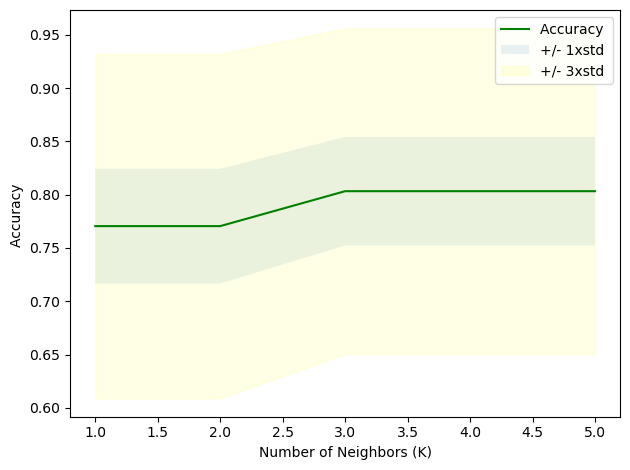

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8032786885245902 with k= 3


### best accuracy = 0.8032786885245902  with k= 3

# Desicion Tree Classifier :

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(criterion="gini", max_depth = 6)
print(tree)

DecisionTreeClassifier(max_depth=6)


In [19]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [20]:
predtree = tree.predict(x_test)

In [21]:
print (predtree [0:5])
print (y_test [0:5])

[0 0 1 1 1]
[1 0 1 1 0]


In [22]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

DecisionTrees's Accuracy:  0.8688524590163934


### DecisionTrees's Accuracy: 0.8688524590163934

# Logistic Regression Classifier : 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [18]:
yhat = LR.predict(x_test)
print(f'y_prediction is: {yhat}')
print(f'y_test is:      {y_test}')

y_prediction is: [1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]
y_test is:      [1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [25]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.37631007, 0.62368993],
       [0.72008853, 0.27991147],
       [0.40239548, 0.59760452],
       [0.19110398, 0.80889602],
       [0.40269454, 0.59730546],
       [0.5020939 , 0.4979061 ],
       [0.63153146, 0.36846854],
       [0.23317107, 0.76682893],
       [0.49337482, 0.50662518],
       [0.36550033, 0.63449967],
       [0.4291565 , 0.5708435 ],
       [0.20223981, 0.79776019],
       [0.39380703, 0.60619297],
       [0.56885837, 0.43114163],
       [0.33174526, 0.66825474],
       [0.86267505, 0.13732495],
       [0.29399232, 0.70600768],
       [0.29111268, 0.70888732],
       [0.6773343 , 0.3226657 ],
       [0.45853907, 0.54146093],
       [0.24193055, 0.75806945],
       [0.3911356 , 0.6088644 ],
       [0.80506229, 0.19493771],
       [0.46215773, 0.53784227],
       [0.45177731, 0.54822269],
       [0.75409356, 0.24590644],
       [0.58954187, 0.41045813],
       [0.22639078, 0.77360922],
       [0.43524412, 0.56475588],
       [0.80517928, 0.19482072],
       [0.

In [19]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.825

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 4 21]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

Normalized confusion matrix
[[0.92 0.08]
 [0.16 0.84]]


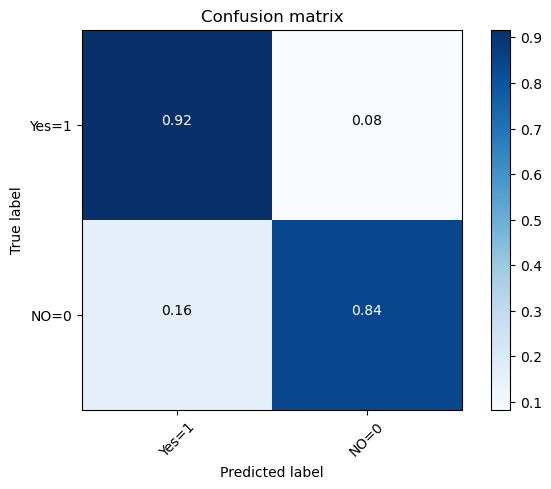

In [21]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes=1','NO=0'],normalize= True,  title='Confusion matrix')

### Jacard score when label=1 is: 0.825
### F1_score weighted avg is:  0.88

# Support vector Machine (SVM) Classifier :

In [22]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [23]:
yhat = clf.predict(x_test)
print(y_test[0:10])
print(yhat [0:10])

[1 0 1 1 0 0 0 1 1 1]
[0 0 1 1 0 0 0 1 1 1]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Normalized confusion matrix
[[0.96 0.04]
 [0.19 0.81]]


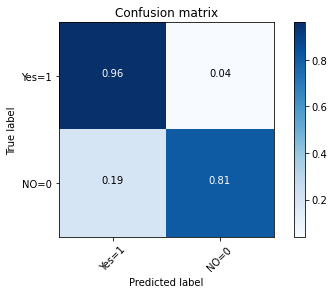

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes=1','NO=0'],normalize= True,  title='Confusion matrix')

In [24]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.7837837837837838

In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8699169682776241

In [26]:
from sklearn.metrics import precision_score
precision_score(y_test, yhat, pos_label=1)

0.9666666666666667

### jaccard_score is: 0.7837837837837838
### f1_score is: 0.8699169682776241
### precision_score is: 0.9666666666666667 